In [1]:
# import libraries:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr
import scipy.stats as scs
from scipy.stats import norm
from datetime import datetime

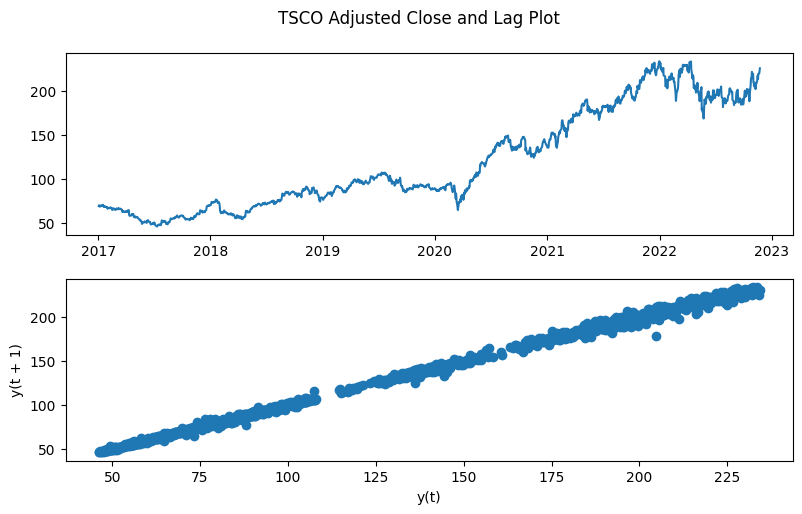

In [2]:
tsco = pdr.get_data_yahoo('TSCO', start = '2017-01-01', end = datetime.today())
fig, axs = plt.subplots(2, figsize=(8,5), dpi=100)
fig.suptitle('TSCO Adjusted Close and Lag Plot')
plt.tight_layout()
axs[0].plot(tsco['Adj Close'])
pd.plotting.lag_plot(tsco["Adj Close"]);

In [3]:
tsco['Log_Ret'] = np.log(tsco['Close'] / tsco['Close'].shift(1))
tsco['Volatility'] = tsco['Log_Ret'].rolling(center=False,window=252).std() * np.sqrt(252)
tsco.tail()

,High,Low,Open,Close,Volume,Adj Close,Log_Ret,Volatility
Date,,,,,,,,
2022-11-17,217.990005,211.149994,216.339996,214.880005,1017200.0,213.960007,-0.019449,0.355742
2022-11-18,220.410004,215.600006,217.600006,219.860001,1205700.0,219.860001,0.022911,0.356259
2022-11-21,221.509995,216.190002,216.360001,220.440002,970300.0,220.440002,0.002635,0.356220
2022-11-22,224.139999,220.850006,222.369995,223.539993,688900.0,223.539993,0.013965,0.356437
2022-11-23,227.399994,223.360001,224.229996,226.179993,591531.0,226.179993,0.011741,0.356262


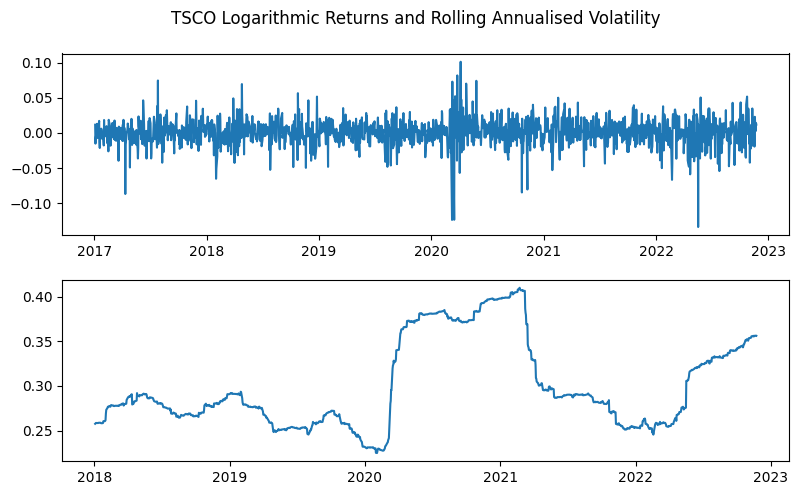

In [4]:
fig, axs = plt.subplots(2, figsize=(8,5), dpi=100)
fig.suptitle('TSCO Logarithmic Returns and Rolling Annualised Volatility')
plt.tight_layout()
axs[0].plot(tsco['Log_Ret'])
axs[1].plot(tsco['Volatility']);

In [5]:
quarterly_tsco = tsco.resample('q').mean()
quarterly_tsco.tail()

,High,Low,Open,Close,Volume,Adj Close,Log_Ret,Volatility
Date,,,,,,,,
2021-12-31,221.111094,216.388437,218.771875,218.790469,7.071828e+05,214.570588,0.002555,0.263685
2022-03-31,224.532580,217.726290,221.337258,221.050160,1.002940e+06,217.495925,-0.000357,0.255912
2022-06-30,206.682580,199.872097,203.431612,203.285967,1.245497e+06,200.877751,-0.002993,0.291184
2022-09-30,197.025156,192.048436,194.688750,194.656561,1.147064e+06,193.356630,-0.000656,0.332900
2022-12-31,211.441052,204.525789,207.761843,208.320789,1.320290e+06,207.529151,0.005164,0.350008


,IUDBEDR
Date,
2022-11-22,3.0
2022-11-21,3.0
2022-11-18,3.0
2022-11-17,3.0
2022-11-16,3.0


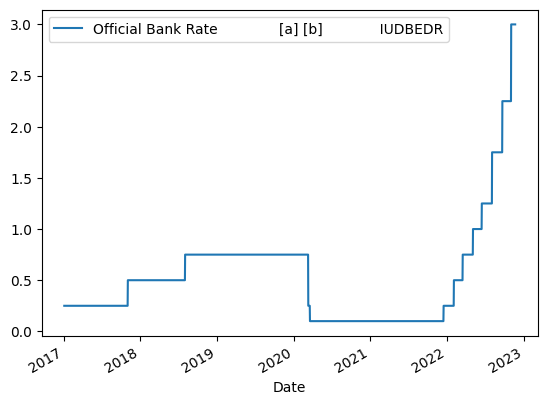

In [141]:
# obtain the BoE Bank Rate (Interest Rate)
df = pd.read_csv(r'C:\Users\hayes\Downloads\Bank of England Database.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.plot()
df = df.rename(columns={'Official Bank Rate              [a] [b]             IUDBEDR':'IUDBEDR'})
df.head()

In [143]:
# merge the two dataframes on date to facilitate regression
df2 = pd.merge(df, tsco, left_index=True, right_index=True)
df2

,IUDBEDR,High,Low,Open,Close,Volume,Adj Close,Log_Ret,Volatility
Date,,,,,,,,,
2022-11-22,3.00,224.139999,220.850006,222.369995,223.539993,688900.0,223.539993,0.013965,0.356437
2022-11-21,3.00,221.509995,216.190002,216.360001,220.440002,970300.0,220.440002,0.002635,0.356220
2022-11-18,3.00,220.410004,215.600006,217.600006,219.860001,1205700.0,219.860001,0.022911,0.356259
2022-11-17,3.00,217.990005,211.149994,216.339996,214.880005,1017200.0,213.960007,-0.019449,0.355742
2022-11-16,3.00,220.539993,209.559998,212.850006,219.100006,2074400.0,218.161942,0.013324,0.355417
...,...,...,...,...,...,...,...,...,...
2017-01-09,0.25,75.629997,74.680000,75.209999,75.370003,877700.0,69.030937,0.002790,NaN
2017-01-06,0.25,76.029999,75.080002,75.809998,75.160004,1464200.0,68.838623,-0.006234,NaN
2017-01-05,0.25,77.129997,74.940002,76.330002,75.629997,1515000.0,69.269066,-0.015221,NaN


In [144]:
# Regress the TSCO Returns against the Bank Rate:
import statsmodels.api as sm
X = df2['IUDBEDR']
y = df2['Adj Close']
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     46.85
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           1.12e-11
Time:                        22:22:01   Log-Likelihood:                -7909.1
No. Observations:                1456   AIC:                         1.582e+04
Df Residuals:                    1454   BIC:                         1.583e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        109.7428      2.105     52.139      0.000     105.614     113.872
IUDBEDR       19.8296      2.897      6.845      0.000      14.147      25.512
==============================================================================
Omnibus:                      782.579   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.419
Skew:                           0.555   Prob(JB):                     4.85e-34
Kurtosis:                       1.861   Cond. No.                         2.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [150]:
import numpy as np
investment = 1000000
avg_ret = (1+tsco['Log_Ret'].mean())*investment
stdev_ret = np.std(tsco['Log_Ret'])*investment

alpha_1 = 0.05
from scipy.stats import norm
cutoff1 = norm.ppf(alpha_1, avg_ret, stdev_ret)
var_1d1 = investment - cutoff1
var_1d1

var_array = []
num_days = int(10)
for x in range(1, num_days+1):    
    var_array.append(np.round(var_1d1 * np.sqrt(x),2))
    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d1 * np.sqrt(x),2)))


1 day VaR @ 95% confidence: 30879.43
2 day VaR @ 95% confidence: 43670.11
3 day VaR @ 95% confidence: 53484.74
4 day VaR @ 95% confidence: 61758.86
5 day VaR @ 95% confidence: 69048.51
6 day VaR @ 95% confidence: 75638.85
7 day VaR @ 95% confidence: 81699.29
8 day VaR @ 95% confidence: 87340.22
9 day VaR @ 95% confidence: 92638.29
10 day VaR @ 95% confidence: 97649.33


In [171]:

mu,std

(0.0007357913784066936, 0.019227169556180618)

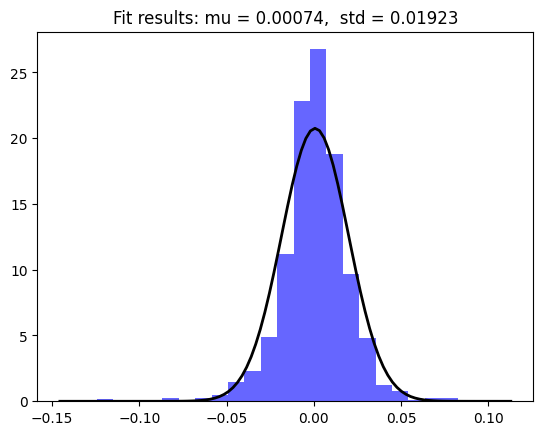

In [175]:
# Fit a normal distribution to the data:
# mean and standard deviation
mu = tsco['Log_Ret'].mean(); std = tsco['Log_Ret'].std() 
# Plot the histogram.
plt.hist(tsco['Log_Ret'], bins=25, density=True, alpha=0.6, color='b')
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.5f,  std = %.5f" % (mu, std)
plt.title(title)
plt.show()